<a href="https://colab.research.google.com/github/john-jehiel/cards-image-classification/blob/main/cards_image_classification_EfficientNet_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load the dataset from kaggle

In [ ]:
pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = r'C:\Users\jnjeh\Downloads\kaggle (1).json'

In [ ]:
!kaggle datasets download gpiosenka/cards-image-datasetclassification/

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification/versions/
License(s): CC0-1.0
 99% 381M/385M [00:12<00:00, 38.2MB/s]
100% 385M/385M [00:12<00:00, 33.0MB/s]


In [ ]:
import zipfile
import os

# Specify the path to the downloaded dataset
zip_file_path = "/content/cards-image-datasetclassification.zip"
extract_to = "cards-image-datasetclassification"

# Extract the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Dataset extracted to {extract_to}")


Dataset extracted to cards-image-datasetclassification


### Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import load_model, Model

### Specify data directories

In [ ]:
train_dir = "/content/cards-image-datasetclassification/train/"
valid_dir = "/content/cards-image-datasetclassification/valid/"
test_dir = "/content/cards-image-datasetclassification/test/"

### Initiatize parameters

In [ ]:
image_size = (224, 224)
batch_size = 32
num_classes = 53

### Data preprocessing

In [ ]:
datagen_train = ImageDataGenerator(rescale=1.0/255.0)

datagen_test = ImageDataGenerator(rescale=1.0/255.0)

datagen_valid = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
train_generator = datagen_train.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = datagen_valid.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen_valid.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


### Build the EfficientNet model

In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(128, activation= 'relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)

### Train the model

In [ ]:
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=20,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=valid_generator.samples // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 146s 314ms/step - accuracy: 0.4051 - loss: 2.3652 - val_accuracy: 0.0234 - val_loss: 4.1791
Epoch 2/20
  1/238 ━━━━━━━━━━━━━━━━━━━━ 31s 132ms/step - accuracy: 0.7812 - loss: 0.8111

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7812 - loss: 0.8111 - val_accuracy: 0.0000e+00 - val_loss: 4.5447
Epoch 3/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 32s 134ms/step - accuracy: 0.8701 - loss: 0.4512 - val_accuracy: 0.7031 - val_loss: 1.1029
Epoch 4/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 177us/step - accuracy: 0.9062 - loss: 0.2360 - val_accuracy: 0.6667 - val_loss: 0.9130
Epoch 5/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 41s 135ms/step - accuracy: 0.9141 - loss: 0.2824 - val_accuracy: 0.9531 - val_loss: 0.1355
Epoch 6/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8750 - loss: 0.2575 - val_accuracy: 0.7778 - val_loss: 0.3217
Epoch 7/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 33s 136ms/step - accuracy: 0.9392 - loss: 0.2107 - val_accuracy: 0.9141 - val_loss: 0.3723
Epoch 8/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 171us/step - accuracy: 0.9375 - loss: 0.2870 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 9/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 41s 135ms/step - accuracy: 0.9404 - loss: 0.1933 - val_ac

### Model evaluation

In [ ]:
print("Evaluating on training data:")
results = model.evaluate(train_generator)
print(f"Training Loss: {results[0]:.4f}")
print(f"training Accuracy: {results[1]:.4f}")

Evaluating on training data:
239/239 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.9683 - loss: 0.1105
Training Loss: 0.1075
training Accuracy: 0.9672


In [ ]:
print("Evaluating on testing data:")
results = model.evaluate(test_generator)
print(results)
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")

Evaluating on testing data:
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9688 - loss: 0.1255
[0.11396975815296173, 0.9698113203048706]
Test Loss: 0.1140
Test Accuracy: 0.9698


In [ ]:
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 676ms/step

Classification Report:
                   precision    recall  f1-score   support

     ace of clubs       1.00      1.00      1.00         5
  ace of diamonds       1.00      1.00      1.00         5
    ace of hearts       1.00      1.00      1.00         5
    ace of spades       1.00      1.00      1.00         5
   eight of clubs       1.00      1.00      1.00         5
eight of diamonds       0.83      1.00      0.91         5
  eight of hearts       0.83      1.00      0.91         5
  eight of spades       0.83      1.00      0.91         5
    five of clubs       1.00      1.00      1.00         5
 five of diamonds       1.00      0.80      0.89         5
   five of hearts       0.83      1.00      0.91         5
   five of spades       1.00      1.00      1.00         5
    four of clubs       1.00      0.80      0.89         5
 four of diamonds       1.00      1.00      1.00         5
   four of hearts       1.00      1.00      1.00  

### Plot training and validation loss

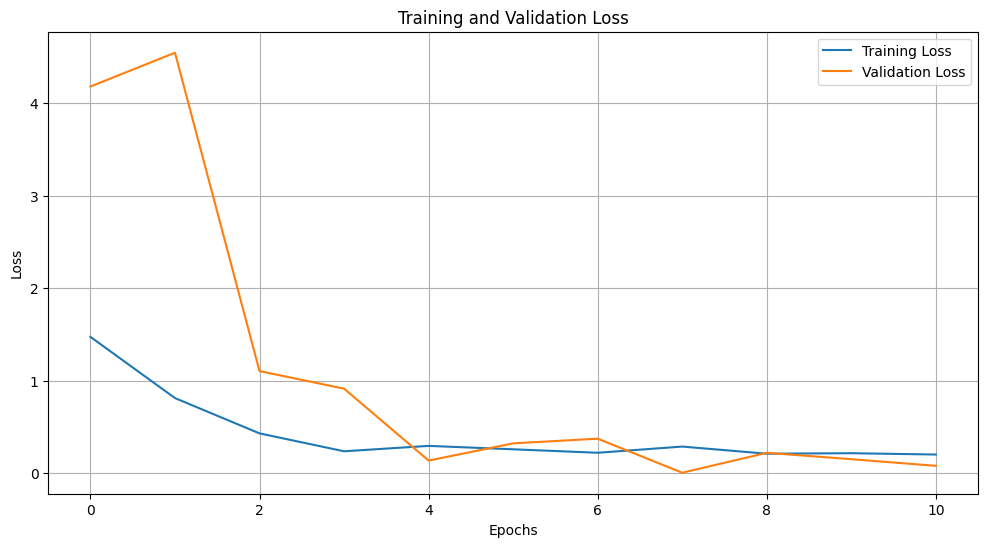

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

### Plot training and validation accuracy

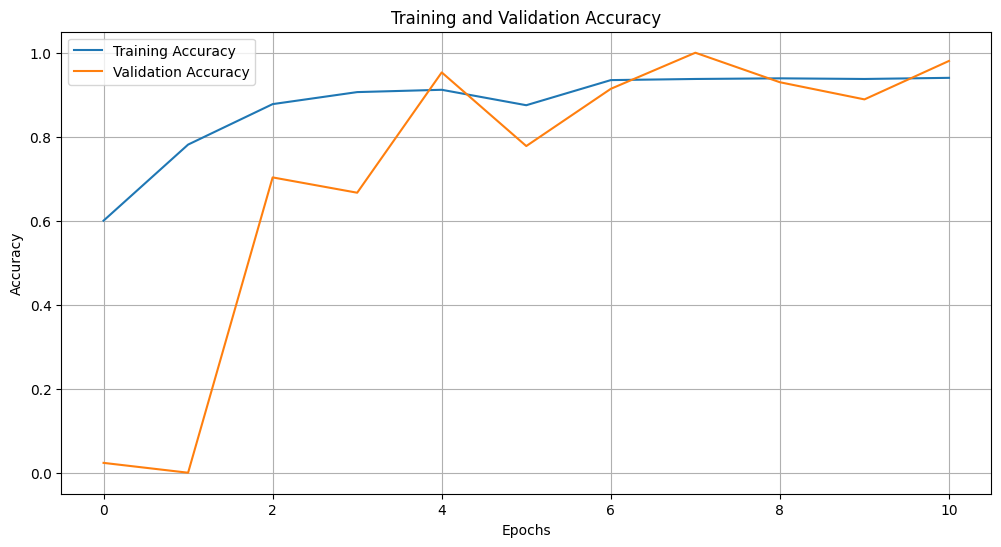

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

### Save the model

In [ ]:
model.save("EfficientNet_v2.h5")
print("Model saved")

Model saved


In [ ]:
loaded_model = load_model("EfficientNet_v2.h5")
print("Model loaded successfully.")

Model loaded successfully.


In [ ]:
# Recompile the loaded model
loaded_model.compile(optimizer='adam',  # Use the same optimizer as before
                     loss='categorical_crossentropy',  # Use the same loss function
                     metrics=['accuracy'])

In [ ]:
loaded_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_8 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_4           │ (None, 224, 224, 3)    │              7 │ rescaling_8[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_9 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_9[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,225,496 (16.12 MB)

 Trainable params: 4,180,913 (15.95 MB)

 Non-trainable params: 44,583 (174.16 KB)

In [ ]:
predictions = loaded_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("\nClassification Report on Test data:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 633ms/step

Classification Report on Test data:
                   precision    recall  f1-score   support

     ace of clubs       1.00      1.00      1.00         5
  ace of diamonds       1.00      1.00      1.00         5
    ace of hearts       1.00      1.00      1.00         5
    ace of spades       1.00      1.00      1.00         5
   eight of clubs       1.00      1.00      1.00         5
eight of diamonds       0.83      1.00      0.91         5
  eight of hearts       0.83      1.00      0.91         5
  eight of spades       0.83      1.00      0.91         5
    five of clubs       1.00      1.00      1.00         5
 five of diamonds       1.00      0.80      0.89         5
   five of hearts       0.83      1.00      0.91         5
   five of spades       1.00      1.00      1.00         5
    four of clubs       1.00      0.80      0.89         5
 four of diamonds       1.00      1.00      1.00         5
   four of hearts       1.00      1.0

In [ ]:
def predict_single_image(image_path):
    # Load and preprocess the image
    image = load_img(image_path, target_size=image_size)
    image_array = img_to_array(image) / 255.0  # Normalize the image
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

    # Make a prediction
    prediction = loaded_model.predict(image_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    predicted_label = class_labels[predicted_class]

    # Display the predicted class
    print(f"Predicted Class: {predicted_label}")

    # Display the image
    plt.imshow(image)
    plt.title(f"Predicted Class: {predicted_label}")
    plt.axis('off')  # Hide axes
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predicted Class: six of spades


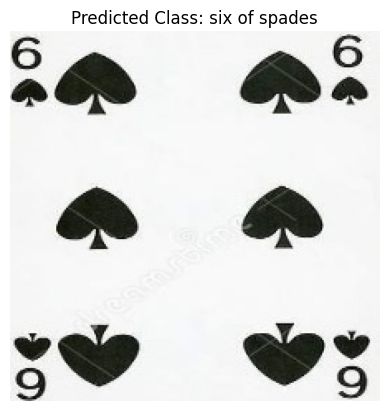

In [ ]:
predict_single_image("/content/cards-image-datasetclassification/valid/six of spades/1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Class: eight of hearts


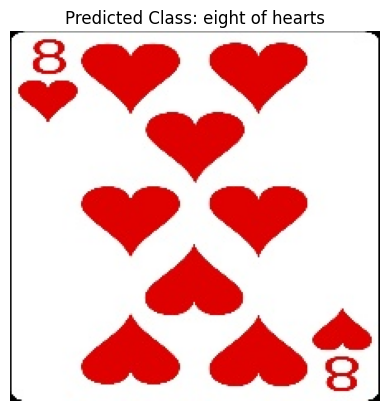

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Class: eight of hearts


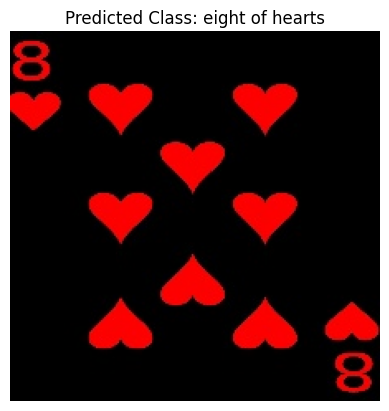

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Class: eight of hearts


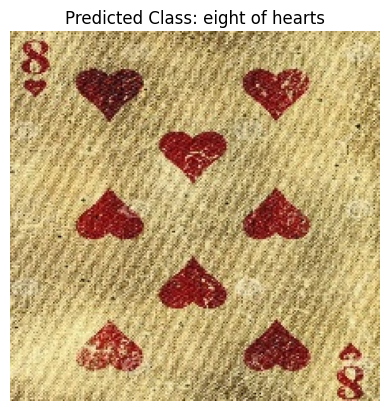

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Class: eight of hearts


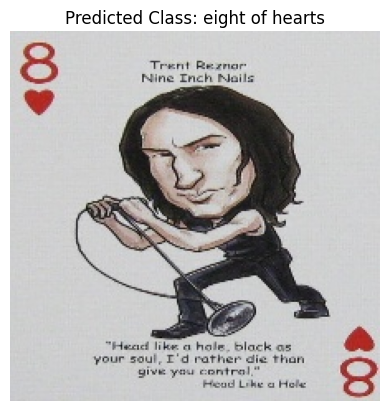

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Class: eight of hearts


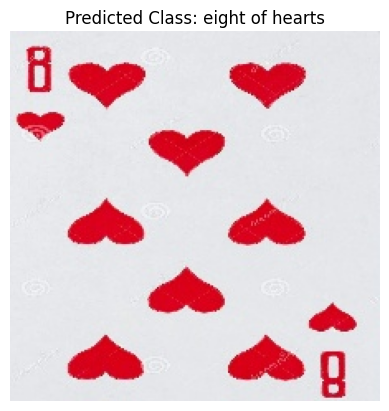

In [ ]:
for i in range(1,6):
  predict_single_image(f"/content/cards-image-datasetclassification/valid/eight of hearts/{i}.jpg")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


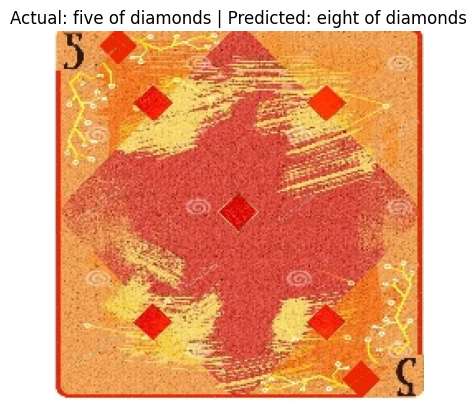

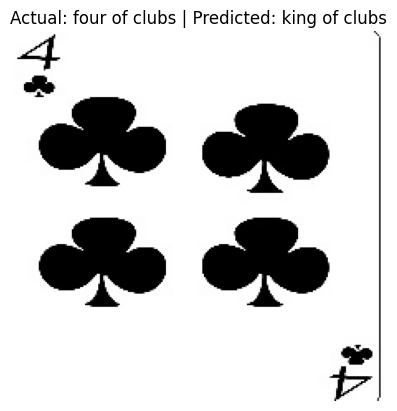

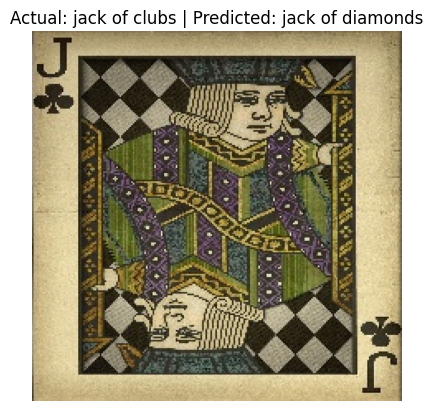

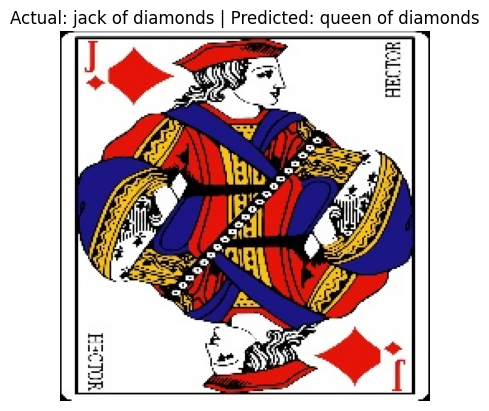

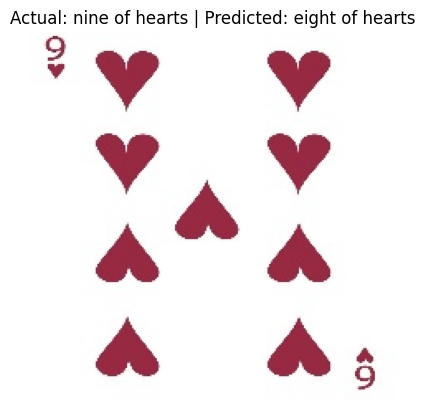

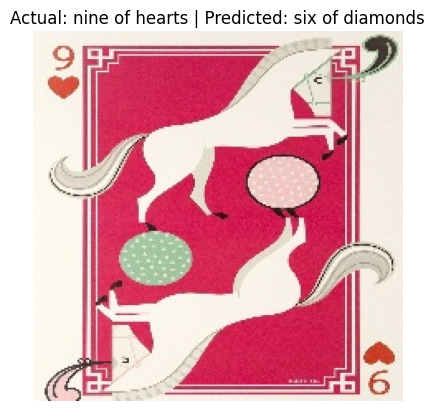

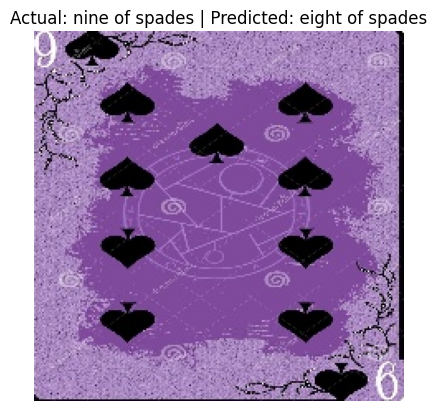

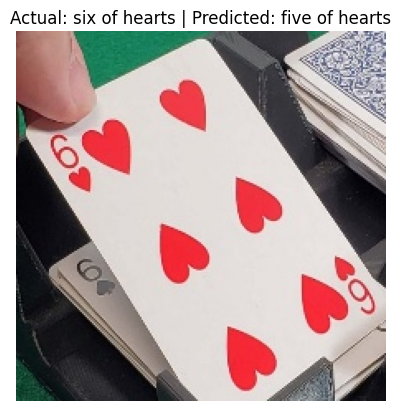

In [ ]:
predictions = loaded_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Identify incorrectly predicted images
incorrect_indices = np.where(predicted_classes != true_classes)[0]

# Display incorrect predictions
for i in incorrect_indices:
    # Get the image path corresponding to the index
    image_path = test_generator.filepaths[i]

    # Load and display the image
    image = load_img(image_path, target_size=(224, 224))  # Adjust size if necessary
    plt.imshow(image)

    # Get predicted and true labels
    predicted_label = class_labels[predicted_classes[i]]
    actual_label = class_labels[true_classes[i]]

    # Show the title with actual and predicted labels
    plt.title(f"Actual: {actual_label} | Predicted: {predicted_label}")
    plt.axis('off')  # Hide axes
    plt.show()
